# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Replace 'joined_data.csv' with your actual csv file path

In [3]:
df = pd.read_csv("C:/Users/52551/Google Drive/1Trabajo/Data career/MasterSchool/GloBox_AB_Test_Analysis_Project/CSV Files/joined_data.csv")

print(df.head())


        id country gender      uid group     join_dt device  uid.1   dt  \
0  1000000     CAN      M  1000000     B  2023-01-28      I    NaN  NaN   
1  1000001     BRA      M  1000001     A  2023-01-27      A    NaN  NaN   
2  1000002     FRA      M  1000002     A  2023-02-01      A    NaN  NaN   
3  1000003     BRA      M  1000003     B  2023-01-25      I    NaN  NaN   
4  1000004     DEU      F  1000004     A  2023-02-04      A    NaN  NaN   

  device.1  spent  
0      NaN    NaN  
1      NaN    NaN  
2      NaN    NaN  
3      NaN    NaN  
4      NaN    NaN  


In [5]:
print(df.columns)


Index(['id', 'country', 'gender', 'uid', 'group', 'join_dt', 'device', 'uid.1',
       'dt', 'device.1', 'spent'],
      dtype='object')


### Convert to datetime, if necessary

In [6]:
df['dt'] = pd.to_datetime(df['dt'])
df['join_dt'] = pd.to_datetime(df['join_dt'])

### Replace NULL in spent column


In [7]:
df['spent'] = df['spent'].fillna(0)


### Descriptive Analysis

In [10]:
group_stats = df.groupby('group')['spent'].describe()
print(group_stats)

         count      mean        std  min  25%  50%  75%     max
group                                                          
A      24402.0  3.366359  25.366939  0.0  0.0  0.0  0.0  1659.4
B      24680.0  3.379875  24.792782  0.0  0.0  0.0  0.0  1546.3


### T-Test

In [11]:
group_A = df[df['group'] == 'A']['spent']
group_B = df[df['group'] == 'B']['spent']

t_stat, p_val = stats.ttest_ind(group_A, group_B)

print(f'T-test statistic: {t_stat}')
print(f'P-value: {p_val}')

T-test statistic: -0.0596964133699201
P-value: 0.9523976714075935


### Confidence Interval of the difference

In [13]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(group_A), sms.DescrStatsW(group_B))
conf_int = cm.tconfint_diff(usevar='unequal')
print(f'95% Confidence interval: {conf_int}')


95% Confidence interval: (-0.45734574640733006, 0.4303136654052573)


### Visualize

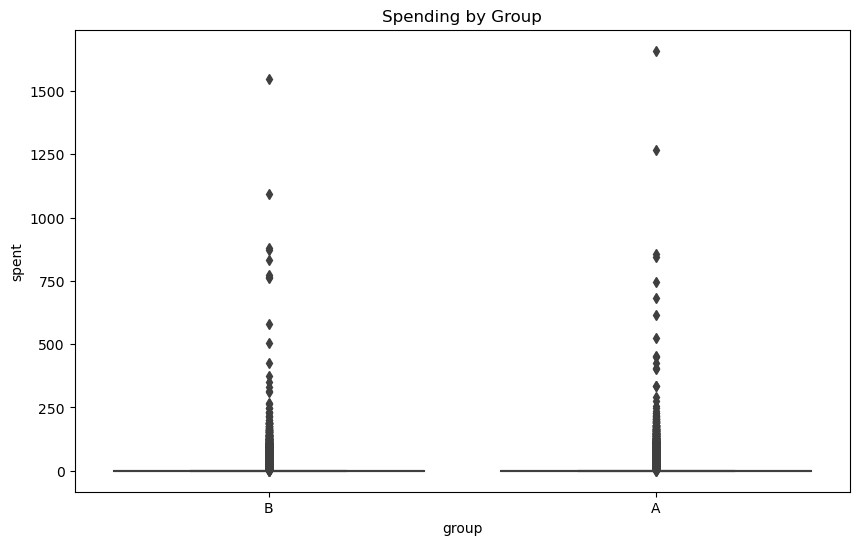

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='group', y='spent', data=df)
plt.title('Spending by Group')
plt.show()


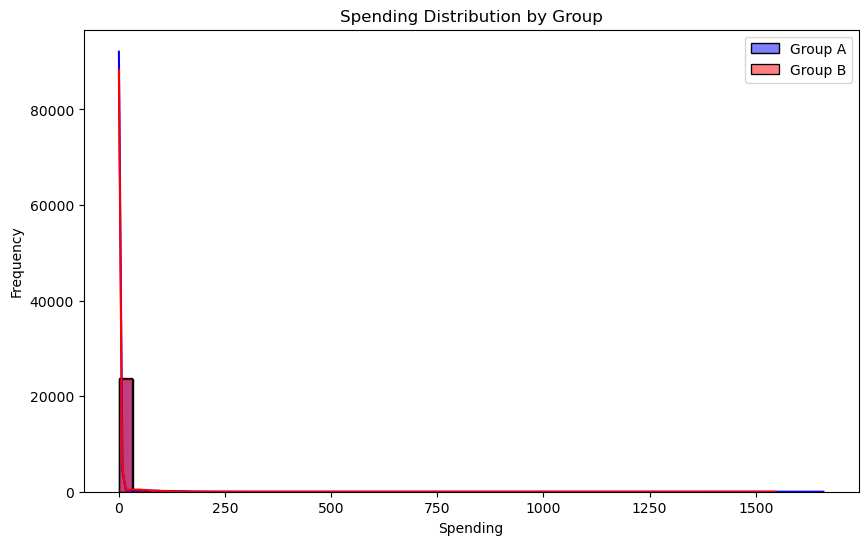

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.histplot(df[df['group'] == 'A']['spent'], kde=True, color='blue', label='Group A', bins=50)
sns.histplot(df[df['group'] == 'B']['spent'], kde=True, color='red', label='Group B', bins=50)

plt.title('Spending Distribution by Group')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.legend()
plt.show()
